# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [124]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [125]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet  yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [58]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler

# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555944.000,1571207.000,1555944.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555944.000
mean,1.673,1.501,2.866,1.057,164.388,162.328,1.252,12.615,1.106,0.492,2.193,0.331,0.298,18.560,2.297
std,0.470,1.143,3.735,0.814,65.738,70.025,0.486,11.766,1.254,0.079,2.687,1.587,0.035,14.345,0.706
min,1.000,0.000,-27.090,1.000,1.000,1.000,0.000,-400.000,-4.500,-0.500,-35.000,-32.740,-0.300,-400.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,128.070,99.000,265.000,265.000,4.000,1718.500,10.540,39.510,433.370,126.120,0.300,1722.300,2.750


In [4]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1555944 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1555944 non-null  float64       
 6   store_and_fwd_flag     1555944 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [5]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555944.000,1571207.000,1555944.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555944.000
mean,1.673,1.501,2.866,1.057,164.388,162.328,1.252,12.615,1.106,0.492,2.193,0.331,0.298,18.560,2.297
std,0.470,1.143,3.735,0.814,65.738,70.025,0.486,11.766,1.254,0.079,2.687,1.587,0.035,14.345,0.706
min,1.000,0.000,-27.090,1.000,1.000,1.000,0.000,-400.000,-4.500,-0.500,-35.000,-32.740,-0.300,-400.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,128.070,99.000,265.000,265.000,4.000,1718.500,10.540,39.510,433.370,126.120,0.300,1722.300,2.750


### Descripción de Columnas del Dataset.


In [6]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [9]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

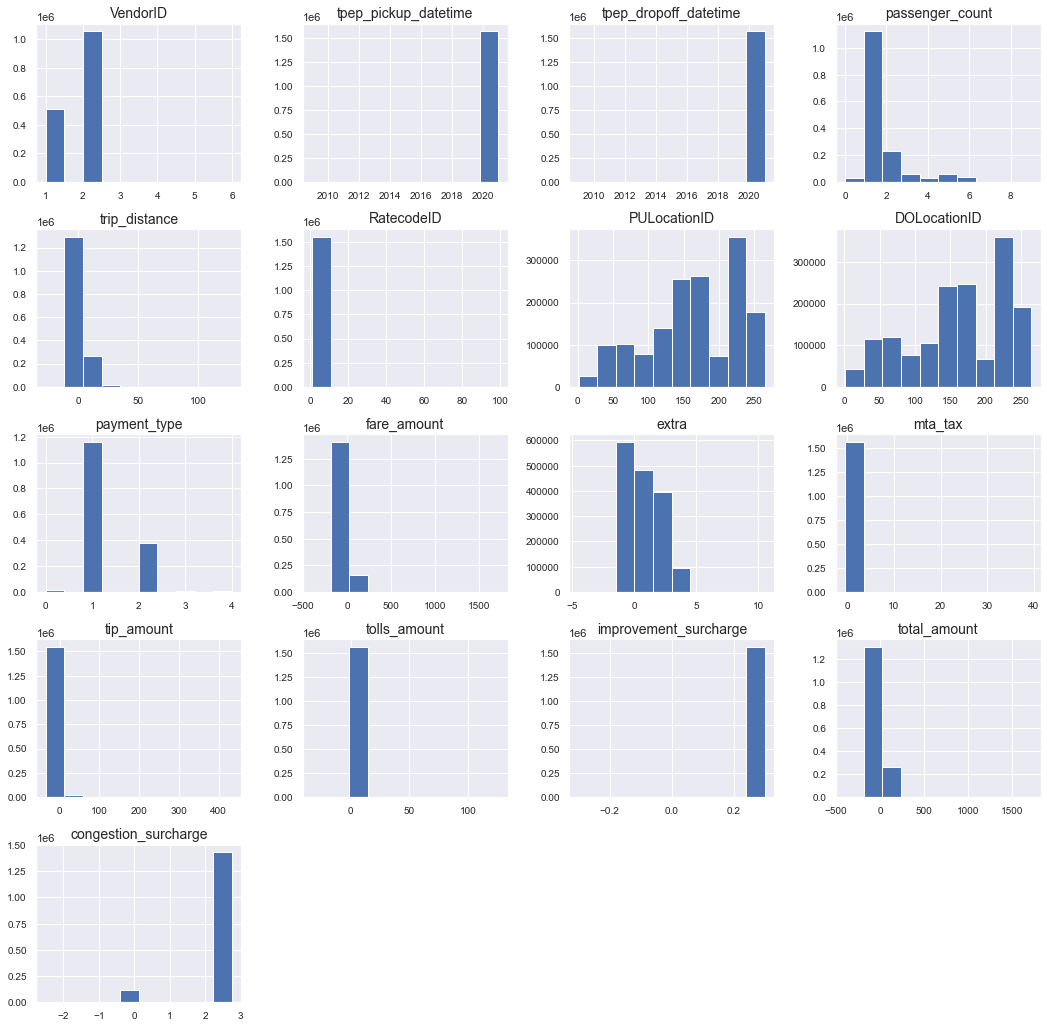

In [10]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [11]:
print_categorical(df.VendorID)

Ordinalidad: [1 2 6 5]
Cantidad de nulos: 0/1571063
Ocurrencias:
5          3
6         60
1     514806
2    1056194
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [134]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [135]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [136]:
print_null_info(df.passenger_count)

Cantidad de nulos: 15112/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [137]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [138]:
print_categorical(df.PULocationID)

Ordinalidad: [ 90 107  48 132 237 230 141 163 161 162  75 137 229 262 186 164 138 223
 238 234 100 140 125 170 239 263 236 142  41 264  87  45 246 211  50  43
  68 231 249 166 113  79 158 261 129   4  74 148  28 144 143  52  13  66
   7 116  69 232 151 233 114 152  51  33 112 145  88  42 181 195  24 182
 193 146  93  65  49 121 258 244 224 260  18 179 242 265  36 206  80 155
  40 106 209 226  17 185  85 255  61  97  22 194 210 191  16 130 218  67
 200  12 228  25 159 208  64 202 259 243  76 169 180  34 219 256  14  35
 215 188 124 247 189 168 123  62 248 139 197  56  47 174 119 225  92 147
 196 214  78 222 135  55  82  10 167  89 165 122 213 157 216 254 175  71
 126 184  95 235  21 212  37  91  70  32  20 173 227 115 118  53  39 136
 127 217  72 177  81 253 134  38  46 198  83 131  77   1 101 203 117  11
  26 160 220 207  63 178 108 149 156 133  94  98   9 153 171 192 241  15
  54 205  19 183 252   3  29  44 190 102  86 240 257 250  73  23  60 201
   8  27 150 128   5  84 154  58 109 2


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [139]:
print_categorical(df.DOLocationID)

Ordinalidad: [186 234 166 262 170 236 232 107 137 229  33 230 237  28 246  79 162 143
 223 140 249  48 161 164  43 263  42 142 233  35 148 158 114  68  13 100
 261 145 163 144 213 231  24 255  87  41  23 141  50  89 113 239  65 151
 238  80  75 138  52 125 165  14  93 211  56 196  90 175 181 264 260 243
 180 132 116 189 124  53 185   7 256 112  74 146  40   4 129  88 179 224
  25  66  97 106 193 188 216  49 152   1  45 218 209 118 235 205 123 221
  82  70 265 225  76  94 127  57 244  39 130  98  38  37  55 226   3  61
 160  22 254 176 197  92 157 120 228 135 173  12  78 217  16  69  10 212
 159  17 147 247 167  21 128  51 177  36  77 257  95 227 171  54 198 258
  64 219  83  91 136 195 174 168 119 248 215 202 259  62  72  29 169 133
 194  71 155   9 253 150  34 250 134  85 108 203  26  19  18 240 220  15
 101 210 183  20  63 191 149 182 242 139 117 121 131  47   5 172 241 122
 184 252  86 200  81 178  32 126 206  46  67 222   8 190 208  73  60 153
  27 251 192 102  84  11 207 115 201  


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [140]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  2.  5. nan  3.  4. 99.  6.]
Cantidad de nulos: 15112/1571207
Ocurrencias:
6.000          11
99.000         66
4.000        1209
3.000        3129
5.000        8579
2.000       35495
1.000     1507606
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [141]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 15112/1571207
Ocurrencias:
Y      15921
N    1540174
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [142]:
print_categorical(df.payment_type)

Ordinalidad: [1 2 4 0 3]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4545
3       8130
0      15112
2     382093
1    1161327
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [143]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [144]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [145]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [146]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [147]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [148]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [149]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [150]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 15112/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [151]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [11]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.describe() #TODO: Agrego describe para que se noten las cantidades eliminadas

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571077.000,1555944.000,1571077.000,1555944.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1571077.000,1555944.000
mean,1.673,1.501,2.866,1.057,164.391,162.331,1.252,12.614,1.106,0.492,2.193,0.331,0.298,18.559,2.297
std,0.470,1.143,3.734,0.814,65.737,70.023,0.486,11.765,1.253,0.079,2.688,1.587,0.035,14.345,0.706
min,1.000,0.000,-27.090,1.000,1.000,1.000,0.000,-400.000,-4.500,-0.500,-35.000,-32.740,-0.300,-400.300,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.890,2.500
max,6.000,9.000,128.070,99.000,265.000,265.000,4.000,1718.500,10.540,39.510,433.370,126.120,0.300,1722.300,2.750


In [12]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571077
tpep_pickup_datetime: 0/1571077
tpep_dropoff_datetime: 0/1571077
passenger_count: 15133/1571077
trip_distance: 0/1571077
RatecodeID: 15133/1571077
store_and_fwd_flag: 15133/1571077
PULocationID: 0/1571077
DOLocationID: 0/1571077
payment_type: 0/1571077
fare_amount: 0/1571077
extra: 0/1571077
mta_tax: 0/1571077
tip_amount: 0/1571077
tolls_amount: 0/1571077
improvement_surcharge: 0/1571077
total_amount: 0/1571077
congestion_surcharge: 15133/1571077
airport_fee: 1571077/1571077


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [13]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1555944

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [14]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 2/1555944
fare_amount: 5032/1555944
extra: 2455/1555944
mta_tax: 4910/1555944
tip_amount: 46/1555944
tolls_amount: 129/1555944
improvement_surcharge: 5032/1555944
total_amount: 5032/1555944
congestion_surcharge: 4003/1555944


In [42]:
# Funcion para realizar subplots de variables

def plotVariables(dataframe, varArray):
    fig = plt.figure(figsize=(30,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for j,colName in enumerate(varArray):
        plt.subplot(3,3,j+1)
        plt.plot(dataframe[colName])
        plt.title(colName)
        

#### Exploración gráfica de variables con datos negativos

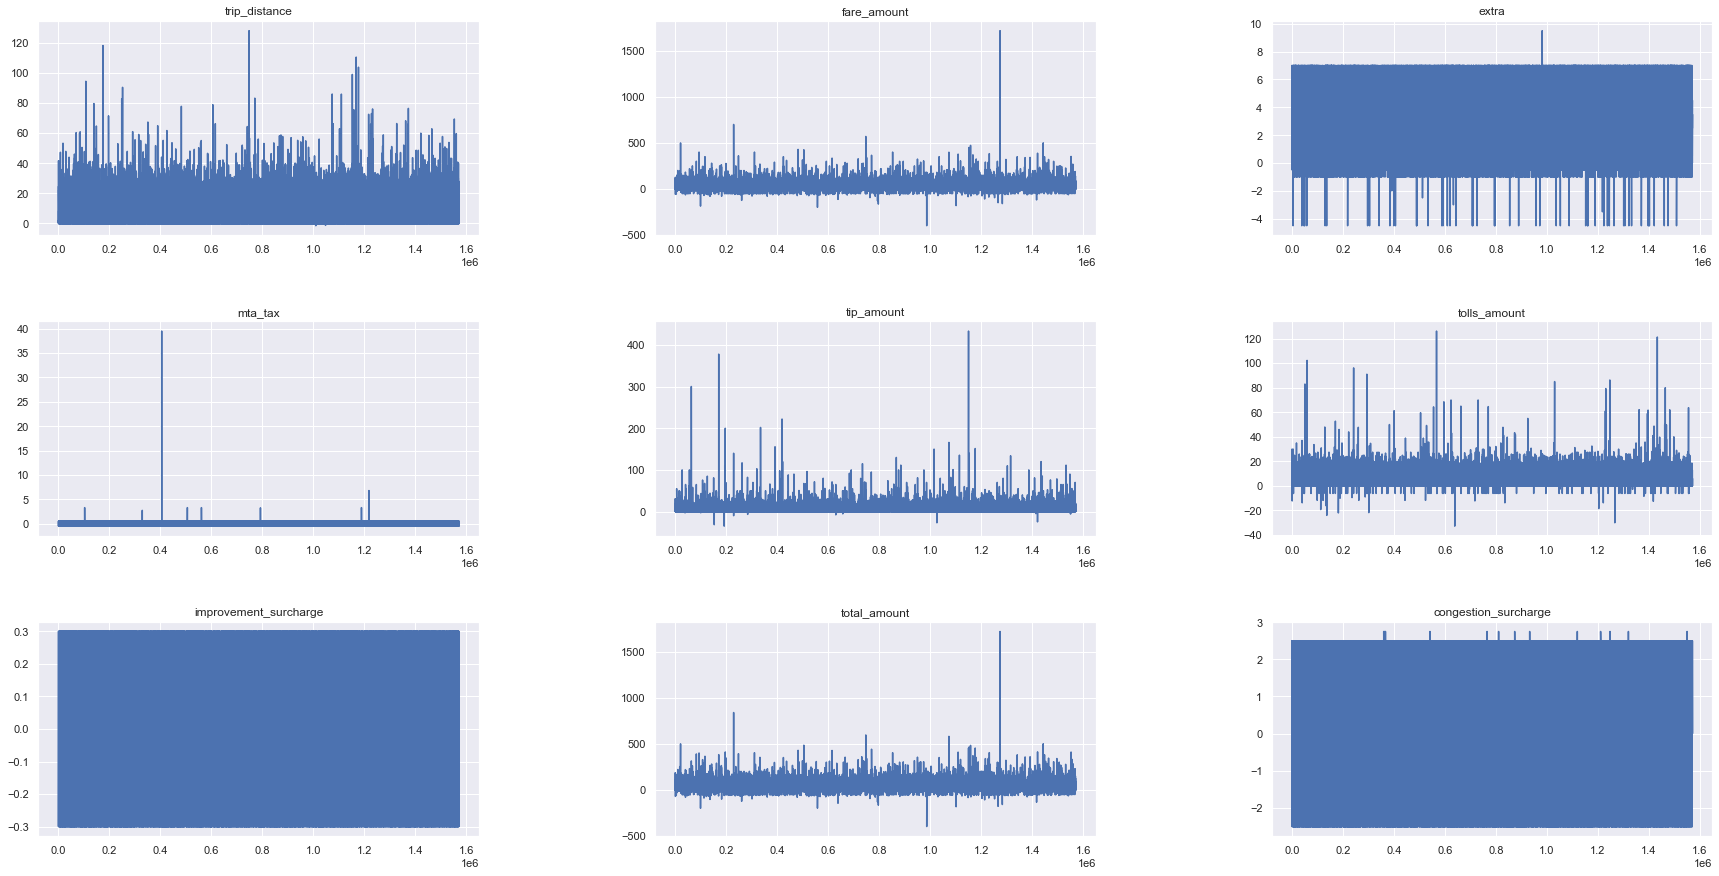

In [43]:
 #TODO: Agrego graficos para mostrar estos datos anomalos.
# Exploración gráfica de variables con datos negativos.

colArrays = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge']

plotVariables(df,colArrays)


In [45]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535401

#### Exploración gráfica de datos filtrados


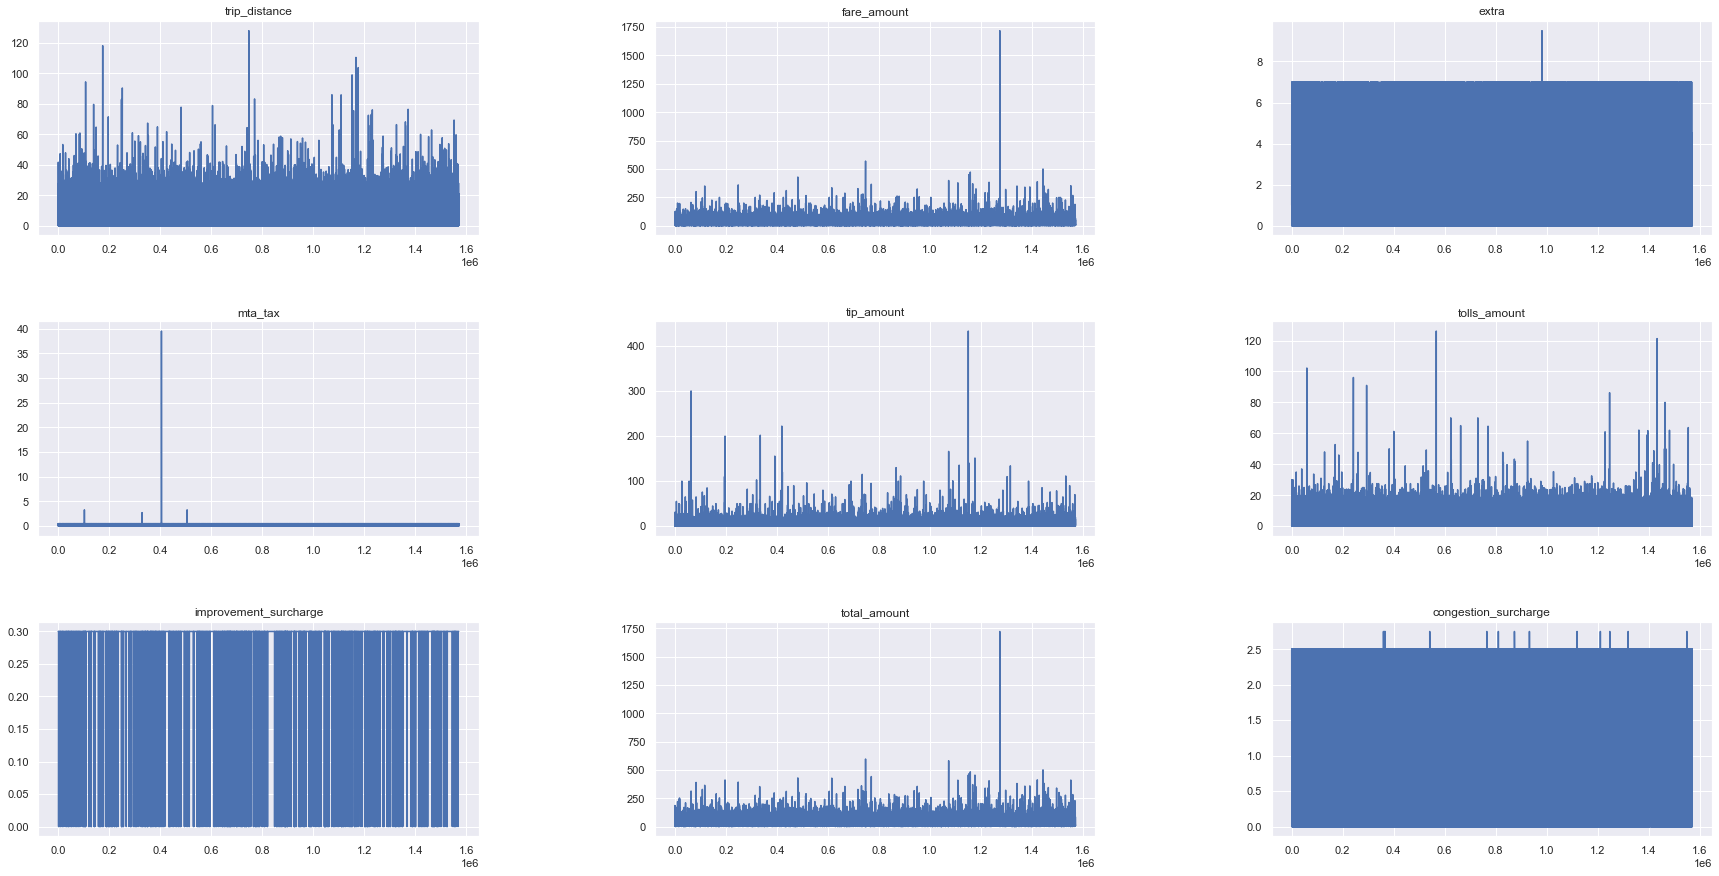

In [46]:
# Datos sin valores negativos
plotVariables(df,colArrays)

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [48]:
df = df[df["payment_type"] == 1]
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000,1151561.000
mean,1.671,1.494,2.871,1.040,165.973,164.051,1.000,12.471,1.131,0.498,2.949,0.340,0.300,19.290,2.380
std,0.470,1.141,3.677,0.296,65.155,69.328,0.000,10.941,1.254,0.031,2.629,1.581,0.003,14.026,0.535
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500
75%,2.000,2.000,2.920,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.380,2.500
max,2.000,9.000,110.510,99.000,265.000,265.000,1.000,500.000,9.500,3.300,433.370,80.000,0.300,581.060,2.750


#### 2.1.3 Eliminación de variables con baja varianza

In [81]:
# TODO
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(train_x)
print(data_constant.shape)


### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [49]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [59]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

In [161]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 0


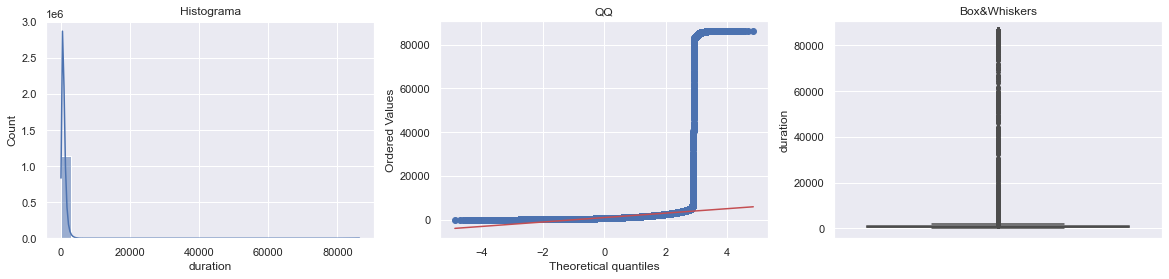

In [61]:
# Graficamos las nuevas columnas para observar su distribucion.
outlier_diagnostic_plots(df, 'duration')

#### Exploración gráfica de Morning, Afternoon, Evening

Text(0.5, 1.0, 'Evening')

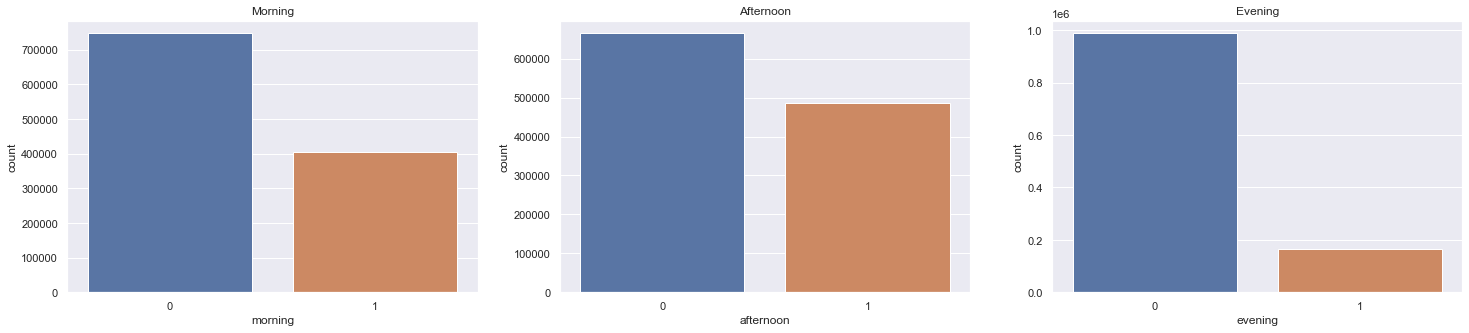

In [80]:
fig,axes = plt.subplots(1,3,figsize=(25,5))


sns.countplot(x='morning', data=df,ax=axes[0])
axes[0].set_title('Morning')

sns.countplot(x='afternoon', data=df,ax=axes[1])
axes[1].set_title('Afternoon')

sns.countplot(x='evening', data=df,ax=axes[2])
axes[2].set_title('Evening')


#### 2.2.2 Codificación del origen y destino

In [162]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
location_id_min_th_count = 0.01
total_items = len(df['PULocationID'])

# convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# convertimos DOLocationID
dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

#pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
def clear_location_low_values(x, th):
  if x <= th:
    return 0
  return x

df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))


#### 2.2.3 Balance de la variable de salida

In [163]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


(1, 265)

In [164]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
location_id_min_th_count = 0.01 * len(df)
df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 11516.76)

In [165]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,PULocationIDFreq,DOLocationIDFreq,DOLocationIDTruncated
count,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000,1151676.000
mean,1.671,1.496,2.864,1.040,166.081,163.967,1.000,12.451,1.130,0.498,2.948,0.339,0.300,19.267,2.379,949.827,0.024,0.020,0.000
std,0.470,1.142,3.699,0.296,65.212,69.356,0.000,10.980,1.253,0.031,2.680,1.603,0.003,14.075,0.537,3581.712,0.013,0.013,0.000
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.730,0.000,0.300,11.800,2.500,400.000,0.018,0.012,0.000
50%,2.000,1.000,1.650,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500,645.000,0.024,0.021,0.000
75%,2.000,2.000,2.900,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.310,2.500,1021.000,0.033,0.028,0.000
max,2.000,9.000,310.900,99.000,265.000,265.000,1.000,804.000,9.500,3.300,450.000,190.000,0.300,1023.670,2.750,86382.000,0.045,0.047,0.000


### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [167]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationIDFreq',
  'morning', 'afternoon', 'evening']
target_col = ['DOLocationID']

X = df[feature_cols]
y = df[target_col]

In [168]:
y.shape

(1151676, 1)

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [169]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


(863757, 1)

In [171]:
#imprimo tamaños de los dataset de train y test
print(f'train len={len(X_train)}')
print(f'test len={len(X_test)}')

train len=863757
test len=287919


### 3.2 Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [174]:
rf.fit(X_train, y_train.values.reshape(-1))


RandomForestClassifier(max_depth=2, random_state=0)

In [175]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [193]:
print(classification_report(y_test,y_rf_pred))
print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.97      0.79       555
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00      1167
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00       815
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00        77
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00       109
          13       0.00      0.00      0.00      2632
          14       0.00      0.00      0.00       182
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00       288
          18       0.00      0.00      0.00        21
          19       0.00    

ValueError: multi_class must be in ('ovo', 'ovr')

### 3.3 Regresión logística

In [ ]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [ ]:
#logistic_regression_report(X_train, X_test, y_train, y_test)
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(random_state = 1)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

lr_precision, lr_recall, lr_threshold

/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multiclass format is not supported

In [ ]:
lr_precision

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl